# **Regresión Logística y Random Forest**
***Integrantes***
* Jasmín Correa
* Javier Martinez
* Marnol Sanchez
* Oscar Polma
* Ariel Valenzuela

## **Conjunto de datos de Census-Income-Data-Set**

##**Introducción**

La realización de este proyecto tiene el fin de predecir los resultados de la probabilidad de que una persona, según ciertas variables, obtenga un nivel de ingreso mayor o menor a 50.000 dolares. Para llvear esto a cabo se utilizó una base de datos que contenía información de 32560 individiduos aproximadamente. La información de estos individuos es edad, tipo de trabajo (workclass), eduación (nivel de escolaridad), estado civil, ocupación, tipo de relación familiar, raza, sexo, capital ganado, capital perdido, horas por semana, nacionalidad e ingreso. Sin embargo no todas ellas serán significativas para la determinación de la probabilidad buscada. Para determinar esta proyección se utilizará el modelo de Regresión Logistica el cual tiene como objetivo estudiar la probabilidad de que ocurra un evento específico en función de una serie de variables que consideramos relevantes. Se utilizará esta regresión ya que nos dará resultados probabilísticos acotados a valores entre 0 y 1 asintóticos, por lo tanto, si determinamos un umbral o punto de operación cualquiera entre 0 y 1, podemos definir que, si un valor arrojado por el modelo de regresión logística está bajo este punto de operación tomará el valor 0, y en el caso contrario si el valor arrojado está por sobre el punto de operación el valor que tomará será 1. Además se utilizará el modelo Random Forest, algoritmo de aprendizaje automático, cuya principal función es tareas de clasificación y regresión. Este modelo está basado en el desarrllo de "árboles" de decisión individuales que se van entrenando.

Las variables a utilizar serán married-civ-spouse, higher education, age, hour per week, male, exec-managerial, professionals and technicians, unmarried, HS-education, own-child y never-married. Estas variables fueron escogidas debido a su alta correlación, lo que nos permite concluir que estás variables serán con las que podremos llegar a resultados más exactos.

Los resultados que se lograron obtener fueorn que el modelo más óptimo fue el de Regresión Logística con un punto de operación de 0.5 el cual logró predecir correctamente 5.348 casos, de los cuales se divien en 787 verdaderos positivos y 4561 verdaderos negativos.



# ***Sección 1***

## *1.1 Importacion de Librerías*

Cargaremos las siguientes librerías las cuales seran usadas para manipulación de datos, visualización de datos, definición de datos de entrenamiento y testeo, modelo de regresión lineal, modelo de random forest y para la evaluación de los modelos.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## *1.2 Importación de Data*

In [47]:
data = pd.read_csv("/content/drive/MyDrive/mineria de datos/TRABAJO 3 MINERIA DE DATOS/datasetT3.csv");data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [48]:
# puede usarse para evitar el uso del google drive, ya que el dataset fue subido a github

#url = ("https://raw.githubusercontent.com/oscarpolma/Mineria-de-datos/main/datasetT3.csv")
#data = pd.read_csv(url);data

Las variables que se encuentran en la base de datos son: edad, tipo de trabajo (workclass), educación (nivel de escolaridad), estado civil, ocupación, tipo de relación familiar, raza, sexo, capital ganado, capital perdido, horas por semana, nacionalidad e ingreso. De estas variables se puede observar una gran cantidad de información, la cual más adelante será revisada y agrupada con el objetivo de realizar un análisis más preciso.

In [49]:
data["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

De la base de datos se puede observar que 24720 individuos tienen un ingreso menor o igual a 50.000 USD y 7841 individuos tienen un ingreso mayor a 50.000 USD.

# ***Sección 2***

## *2.1 Exploratory Data Analysis (EDA)*

### **2.1.1 Informacion, estadistica descriptiva, datos faltantes, datos invalidos y variables repetidas**

#### **2.1.1.a Informacion y estadistica descriptiva**

**Informacion acerca de las Variables**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


PRIMER PROBLEMA: muchos datos tipo object, lo que nos indica que debemos transformarlas a dummies para poder trabajar con ellas. Analizaremos la cantidad de valores diferentes existentes en las variables de tipo object.

**Resumen Estadistica Descriptiva de las Variables**

In [51]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Podemos ver que las variables de caracter cuantitativo no existen valores anormales, por lo que posteriormente se realizará el analisis de datos faltantes o valores invalidos. Además, se puede observar que la media de la edad es 38 años y medio, en promedio los individuos trabajan 40.43 horas a la semana, la educación media de los individuos alcanzaron el High school. La edad minima analizada es 17 años y la máxima es 90 años, también se puede observar que el nivel minimo de educación es Preschool y el nivel máximo es Doctorate. El máximo de horas trabajadas a la semana fueron 99 horas y el mínimo 1 hora.

#### **2.1.1.b Revisión de Datos Faltantes**

In [52]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Text(144.44444444444446, 0.5, 'Indice de fila')

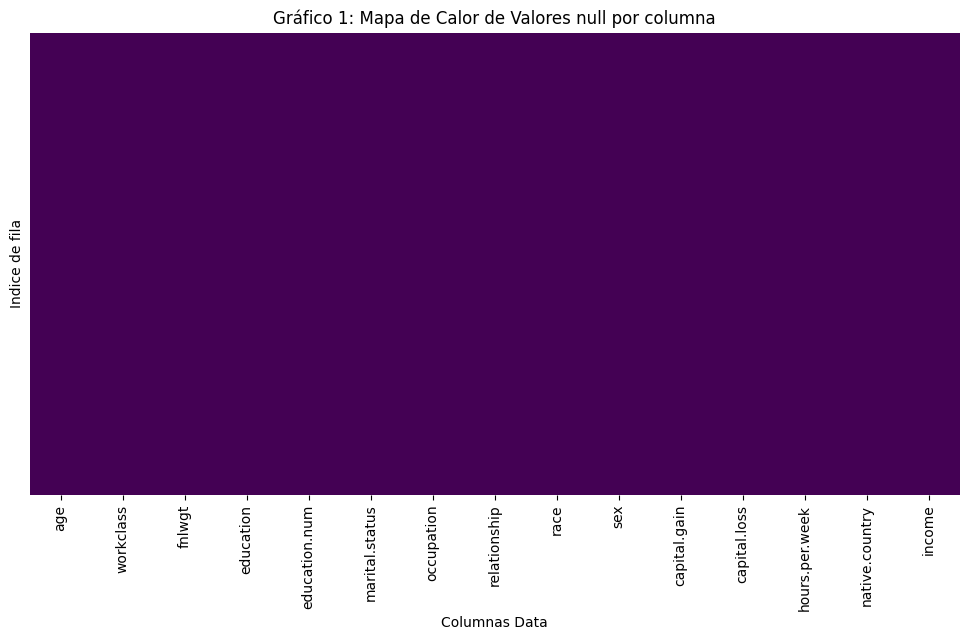

In [53]:
plt.figure(figsize = (12, 6))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Gráfico 1: Mapa de Calor de Valores null por columna")
plt.xlabel('Columnas Data')
plt.ylabel('Indice de fila')

No hay datos nulos en la base de datos a utilizar

#### **2.1.1.c Revisión de Datos Invalidos**

In [54]:
(data == 0).sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num         0
marital.status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain      29849
capital.loss      31042
hours.per.week        0
native.country        0
income                0
dtype: int64

Text(144.44444444444446, 0.5, 'Indice de fila')

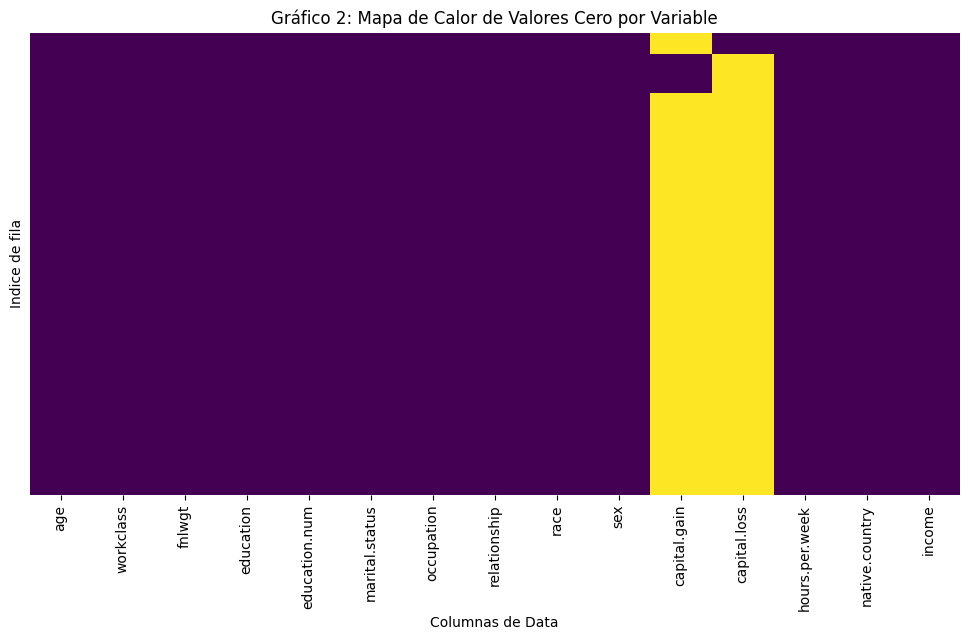

In [55]:
plt.figure(figsize = (12, 6))
sns.heatmap((data == 0), yticklabels = False, cbar = False, cmap = "viridis")
plt.title("Gráfico 2: Mapa de Calor de Valores Cero por Variable")
plt.xlabel('Columnas de Data')
plt.ylabel('Indice de fila')

la variable capital.gain y capital.loss, tienen muchos valores con 0, por lo que es mejor no usar estas variables para el modelado.

#### **2.1.1.d Revisión de variables repetidas**

##### **Conteo de valores en variable education y education.num**

In [56]:
print("Variable education")
print(data[["education"]].value_counts())
print("Variable education.num")
print(data[["education.num"]].value_counts())

Variable education
education   
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
Variable education.num
education.num
9                10501
10                7291
13                5355
14                1723
11                1382
7                 1175
12                1067
6                  933
4                  646
15                 576
5                  514
8                  433
16                 413
3                  333
2                  168
1                   51
Name: count, dtype: int64


##### **Conteo cruzado entre education y education.num**

In [57]:
pd.crosstab(data['education'], data['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


Mediante los codigos anteriores, al realizar el conteo de los valores de la variable education y education.num. Se comprueba que variable education.num, es un numero asociado al nivel academico, por lo que incluir ambas variables dentro del modelado, nos va a crear problemas de multicolinealidad. Por lo que es recomendado eliminar 'education.num' y solamente dejar la variable education, ya que está explicando lo mismo que la variable eliminada, pero al ser una variable object será más sencillo agruparla y transformarla en un booleano.

### **2.1.2 Gráficos**

#### **2.1.2.a Analisis variables tipo object**


Analizaremos la cantidad de valores diferentes por cada variable tipo object, para estudiarlas y escoger cuales seran las seleccionadas para el modelado.

In [58]:
data.select_dtypes(include='object').nunique()

workclass          9
education         16
marital.status     7
occupation        15
relationship       6
race               5
sex                2
native.country    42
income             2
dtype: int64

Visualizamos esto mediante un grafico

Text(0, 0.5, 'Variables')

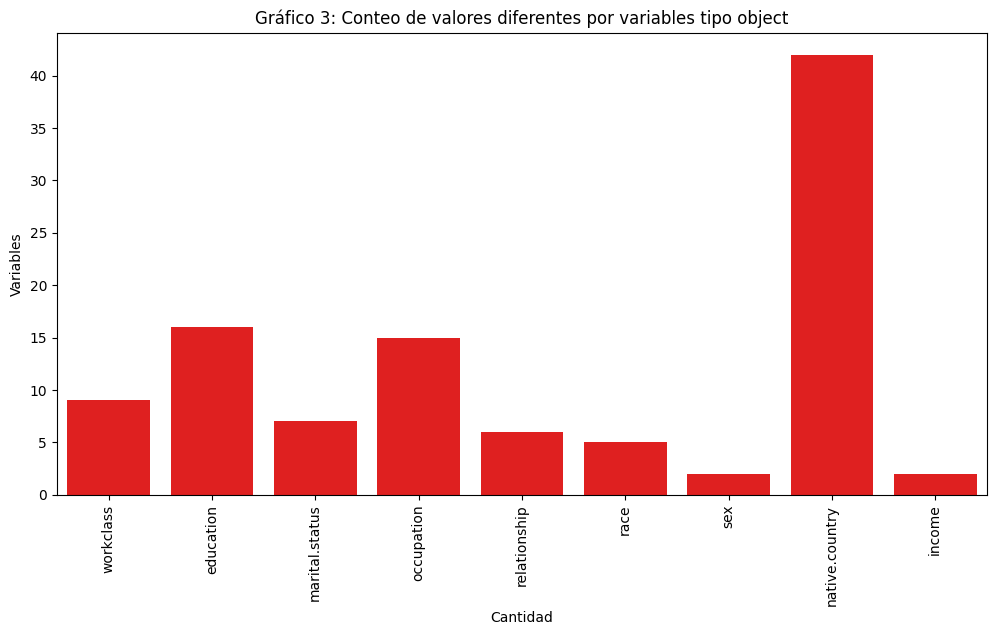

In [59]:
plt.figure(figsize = (12, 6))
sns.barplot(data.select_dtypes(include = 'object').nunique(), color = 'red')
plt.xticks(rotation = 90)
plt.title('Gráfico 3: Conteo de valores diferentes por variables tipo object')
plt.xlabel('Cantidad')
plt.ylabel('Variables')

En este gráfico podemos observar que la variable native.country es la que tiene una mayor cantidad de valores diferentes, esto quiere decir que existen una gran cantidad de nacionalidades dentro de la base de datos, sin embargo, esta información no es relevante ya que la mayoria de los individuos son de nacionalidad estadounidense y son muy pocos los individuos por cada país distinto a EEUU. En resumen hay muchos paises pero muy pocas personas en estos.

#### **2.1.2.b Proporcion variable income**

Text(0.5, 1.0, 'Gráfico 4: Grafico de torta de la variable objetivo')

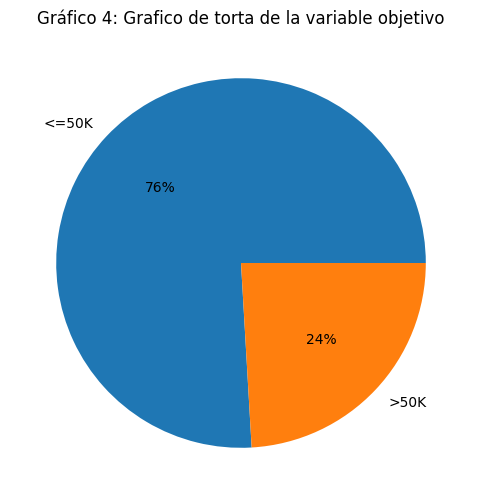

In [60]:
plt.figure(figsize = (12, 6))
plt.pie(data['income'].value_counts(), labels = data['income'].value_counts().index, autopct='%1.f%%')
plt.title('Gráfico 4: Grafico de torta de la variable objetivo')

De la base de datos se puede observar que 76% tienen un ingreso menor o igual a 50.000 USD y 24% individuos tienen un ingreso mayor a 50.000 USD.

#### **2.1.2.c Analisis variable hours.per.week**

Text(0.5, 0, 'Horas trabajadas por semana')

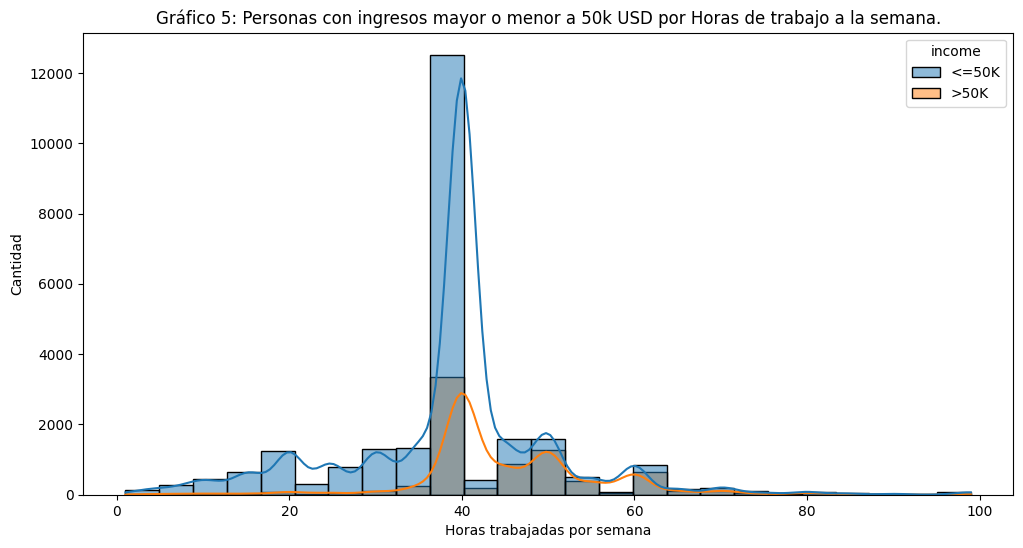

In [61]:
plt.figure(figsize = (12, 6))
sns.histplot(data, x='hours.per.week', bins=25, hue='income', kde = True)
plt.title('Gráfico 5: Personas con ingresos mayor o menor a 50k USD por Horas de trabajo a la semana.')
plt.ylabel('Cantidad')
plt.xlabel('Horas trabajadas por semana')

En este gráfico se puede observar que la mayoría de datos se concentra en los individuos que trabajan 40 horas semanales, teniendo un valor de más de 12.000 individuos que ganan menos de 50.000 USD. Se observa que además las personas que ganan sobre 50.000 USD trabajan 40 horas a la semana o más.

#### **2.1.2.d Analisis variable native.country**


Text(0, 0.5, 'Pais')

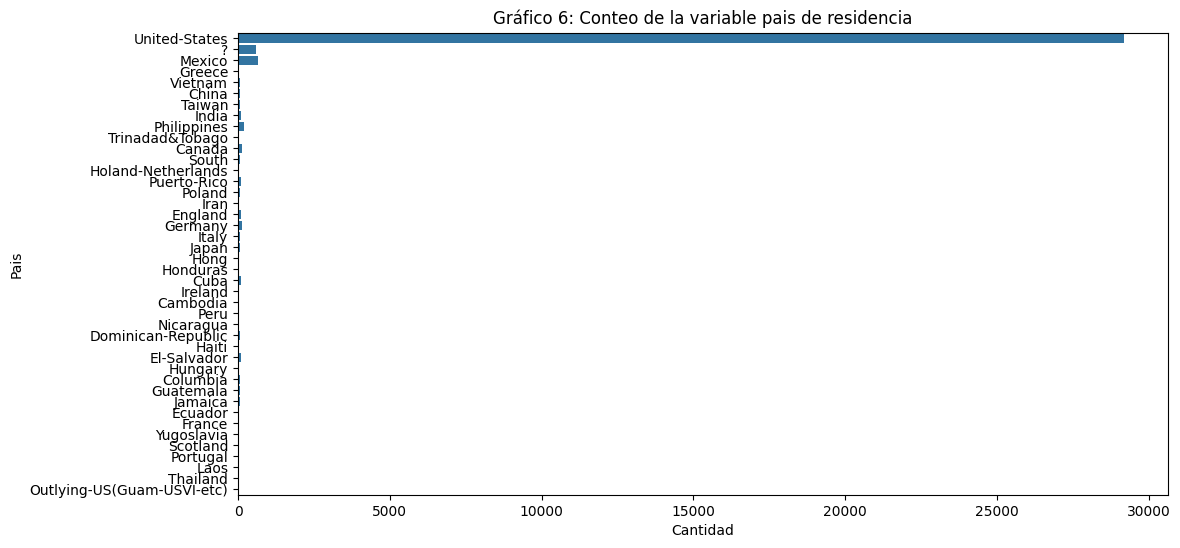

In [62]:
plt.figure(figsize = (12, 6))
sns.countplot(data['native.country'])
plt.title('Gráfico 6: Conteo de la variable pais de residencia')
plt.xlabel('Cantidad')
plt.ylabel('Pais')

Dado que casi todos los datos recogidos pertenecen a personas que residen en USA, esta variable no aporta en nada en el modelado, por lo que la opción más adecuada es eliminarla. Además en este gráfico se puede visualizar con mayor claridad lo mencionado anteriormente (existen muchos paises dentro de la base de datos pero pocos individuos dentro de ellos)

#### **2.1.2.e Analisis variable race por ingreso**


Text(0.5, 0, 'Raza')

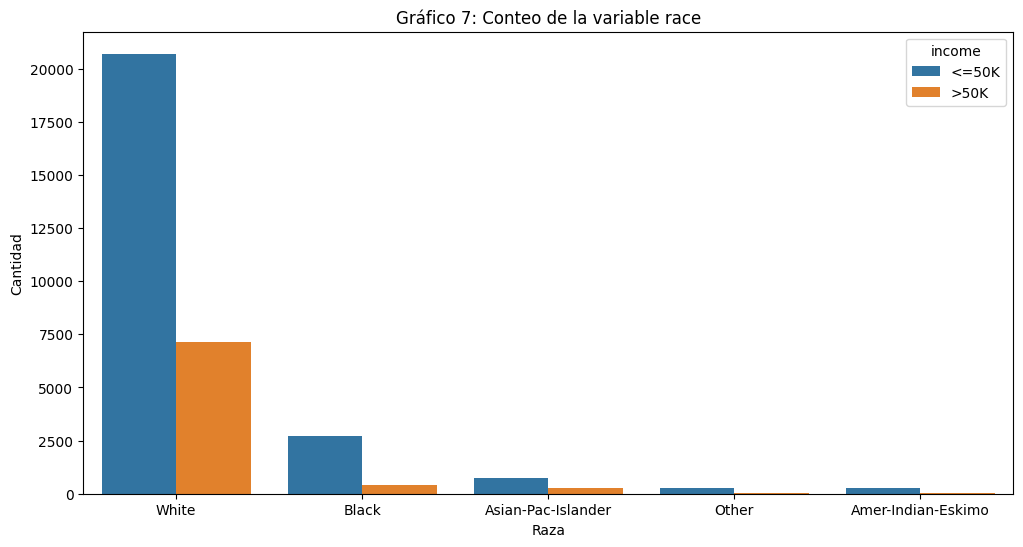

In [63]:
plt.figure(figsize = (12, 6))
sns.countplot(data, x = 'race', hue = 'income')
plt.title('Gráfico 7: Conteo de la variable race')
plt.ylabel('Cantidad')
plt.xlabel('Raza')

En el gráfico se observa que la mayoría de los indiviuos son blancos, siendo estos los que más tiene un ingreso sobre los 50.000 USD, asi como también son los que más ingresos tienen de menos de 50.000 USD

#### **2.1.2.f Analisis de outliers**

##### **Variable capital.gain y capital.loss**

Text(0.5, 0, 'Variables')

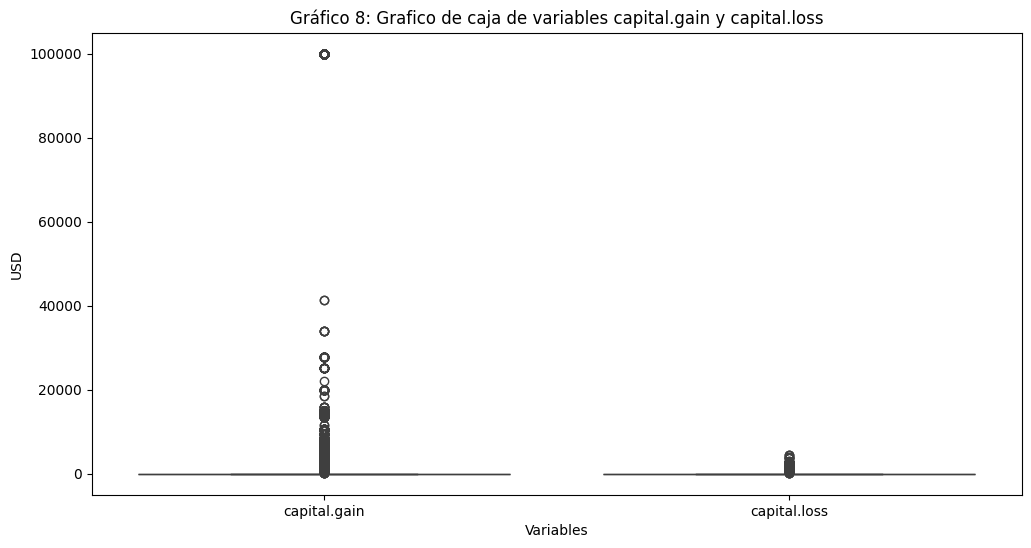

In [64]:
plt.figure(figsize = (12, 6))
sns.boxplot(data[['capital.gain', "capital.loss"]])
plt.title('Gráfico 8: Grafico de caja de variables capital.gain y capital.loss')
plt.ylabel('USD')
plt.xlabel('Variables')

Dada la falta de datos analizada en el EDA, y la dispersion de los datos outliers, estas dos variables no seran consideradas para el modelo, con el fin de no sesgar los resultados.

##### **Variable fnlwgt**

Text(0, 0.5, 'Años')

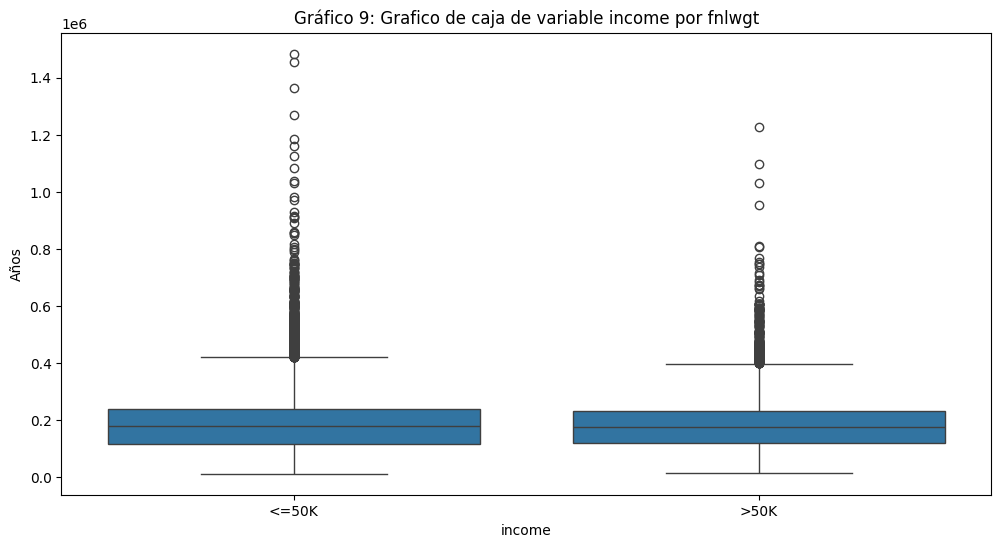

In [65]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, x = 'income', y = data['fnlwgt'])
plt.title('Gráfico 9: Grafico de caja de variable income por fnlwgt')
plt.ylabel('Años')

Esta variable tiene datos muy dispersos entre el primer y tercer cuartil, se encuentran sobre este rango, y al ser muchos datos fuera, podría indicar que se encuentran lejanos a la mediana y la media. Esto puede sesgar el modelo, por lo que esta variable no será tomada en cuenta para el modelado.

#### **2.1.2.g Analisis dispersion y distribucion de variables age y hours.per.week**

##### **Análisis dispersion**

Text(0.5, 0, 'Variables')

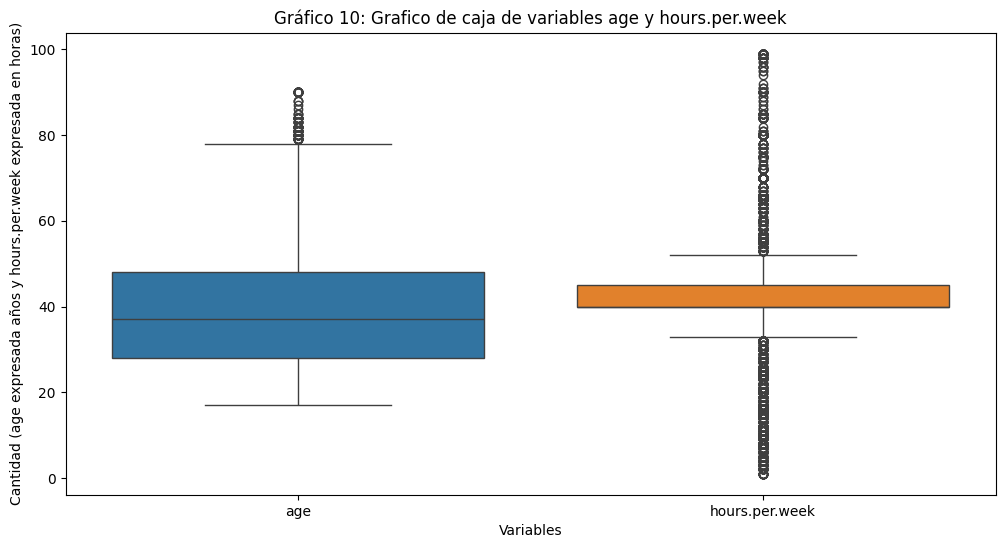

In [98]:
plt.figure(figsize = (12, 6))
sns.boxplot(data[['age', 'hours.per.week']])
plt.title('Gráfico 10: Grafico de caja de variables age y hours.per.week')
plt.ylabel('Cantidad (age expresada años y hours.per.week expresada en horas)')
plt.xlabel('Variables')

La edad está dentro de un promedio de 25 a 45 años, se pueden observar además datos atípicos por sobre los 80 años, por parte de las horas por semana se visualiza que el promedio es un poco mayor 40 horas por semana, sin embargo, se observan muchos datos atipicos que se alejan del promedio, tanto para arriba como para abajo.

##### **Analisis distribucion variable age**

Analizaremos las variables a traves de un grafico de violin para ver su distribucion.

Text(0, 0.5, 'Edad en Años')

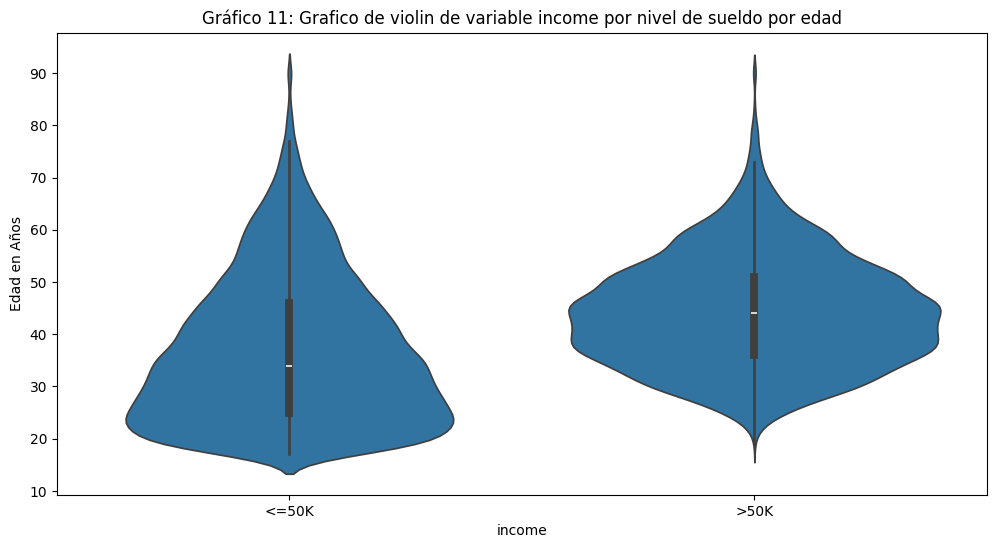

In [67]:
plt.figure(figsize = (12, 6))
sns.violinplot(data = data, x = 'income', y = data['age'])
plt.title('Gráfico 11: Grafico de violin de variable income por nivel de sueldo por edad')
plt.ylabel('Edad en Años')

En el grafico se visualiza una clara diferencia en la distribucion de los datos de age, entre las personas que tienen sueldos mayores a 50k USD y los que tienen un sueldo menor. Las personas con sueldos mayores a 50k suelen ser personas de una edad avanzada, a diferencia de los que tienen sueldos inferiores al umbral. Por lo que esta variable puede arrojar resultados significativos para la prediccion de los resultados en los modelos.

##### **Analisis distribucion variable hours.per.week**

Text(0, 0.5, 'Horas')

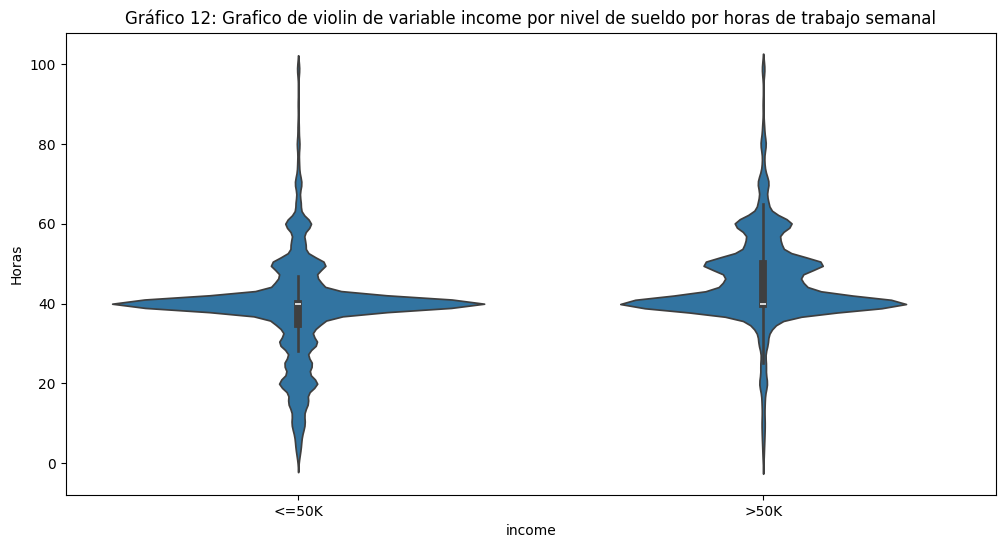

In [68]:
plt.figure(figsize = (12, 6))
sns.violinplot(data = data, x = 'income', y = data['hours.per.week'])
plt.title('Gráfico 12: Grafico de violin de variable income por nivel de sueldo por horas de trabajo semanal')
plt.ylabel('Horas')

Existe un diferencia entre las horas trabajadas entre las personas con ingresos superiores a 50k y los que tienen sueldos inferiores. Por lo que se puede asumir que existe una relacion entre los ingresos y las horas trabajadas. Esta variable nos puede ser muy util para el modelado.

#### **2.1.2.h Conteo grado academico diferenciado por income**

Text(0.5, 1.0, 'Gráfico 13: Conteo education total diferenciao por income')

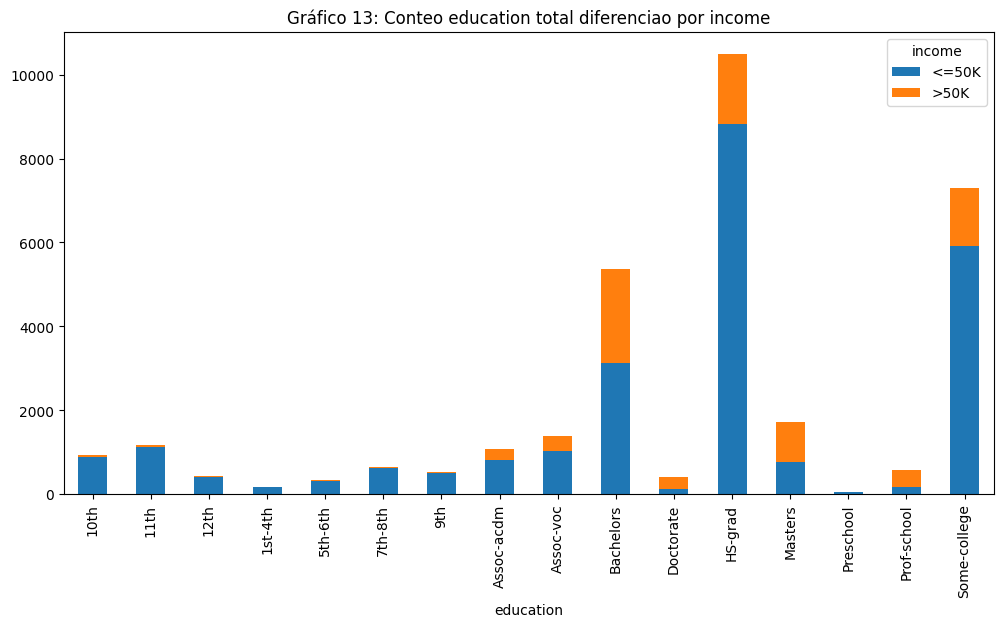

In [69]:
plt.figure(figsize = (12, 6))
pd.crosstab(data['education'], data['income']).plot(kind = 'bar', stacked=True, ax=plt.gca())
plt.title('Gráfico 13: Conteo education total diferenciao por income')

Dado que esta variable representa los cursos o grados alcanzados por los encuestados se puede agrupar entre nivel básico, secundaria, post secundaria y superior. Se puede inferir a partir del gráfico, que personas que estudios superiores al de secundaria tienen mas posibilidades de ganar sobre 50.000 USD.

#### **2.1.2.i Analisis marital.status vs relationship**

##### **Conteo marital.status diferenciado por income**

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Widowed'),
  Text(1, 0, 'Divorced'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Never-married'),
  Text(4, 0, 'Married-civ-spouse'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

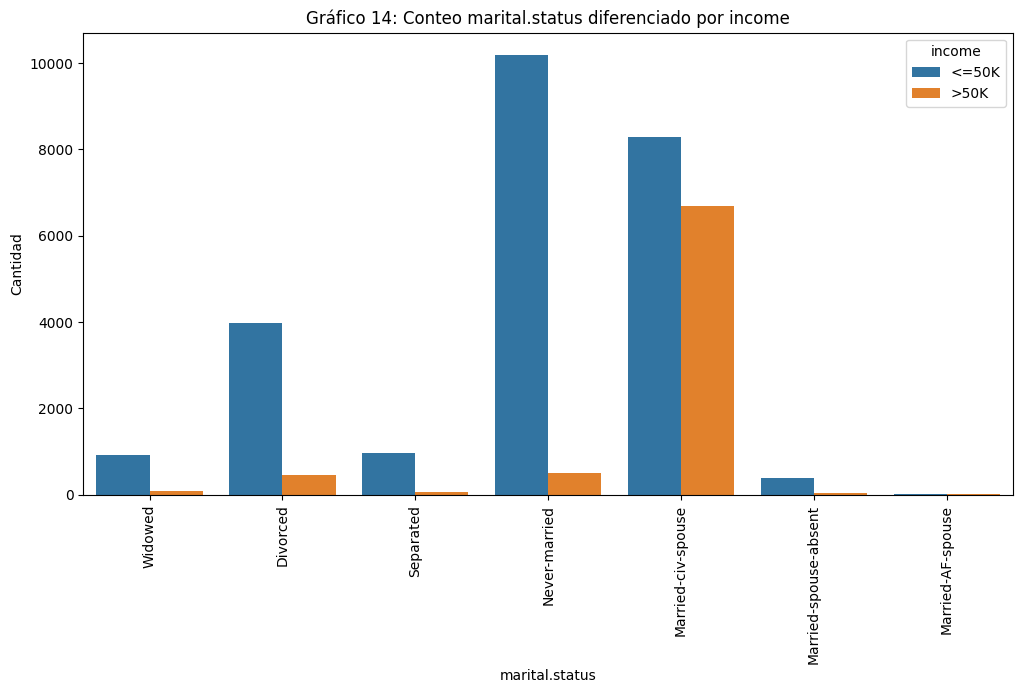

In [70]:
plt.figure(figsize = (12, 6))
sns.countplot(data, x='marital.status', hue='income')
plt.title('Gráfico 14: Conteo marital.status diferenciado por income')
plt.ylabel("Cantidad")
plt.xticks(rotation = 90)

En este gráfico podemos visualizar que las personas que están en una relación civil estable (married-civ-spouse) es la que más agrupa individuos con un ingreso mayor a 50k USD. Además, las personas que nunca han estado casadas (never-married) es la que más agrupa individuos con un ingreso menor a 50k USD.

##### **Conteo relationship diferenciado por income**

Text(0, 0.5, 'Cantidad')

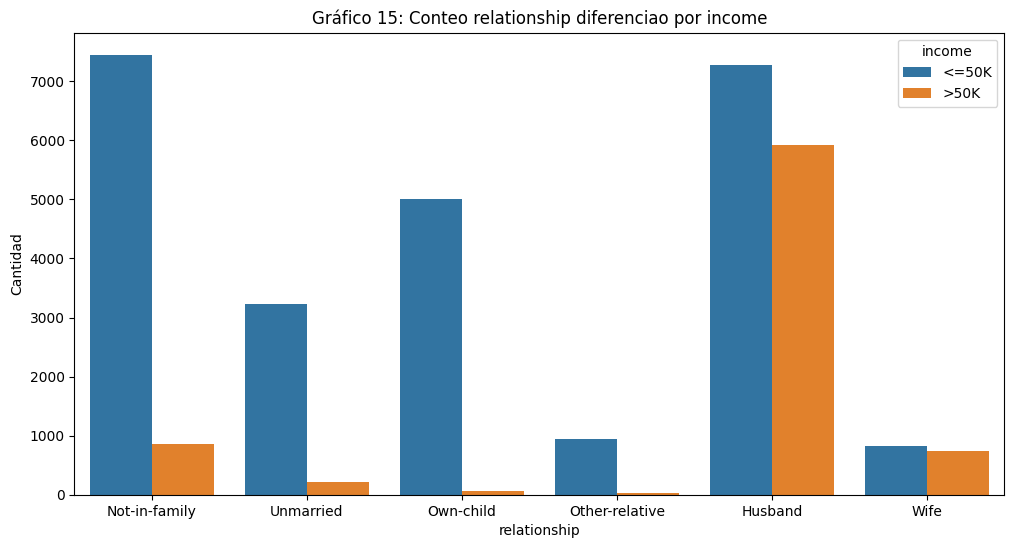

In [97]:
plt.figure(figsize = (12, 6))
sns.countplot(data, x='relationship', hue='income')
plt.title('Gráfico 15: Conteo relationship diferenciao por income')
plt.ylabel("Cantidad")

En este gráfico podemos observar que los hombres que están dentro de un matrimonio (relación Husband) son donde más se agrupan personas con un ingreso mayor a 50k USD. Las personas sin familia, junto con los hombres que están dentro de un matrimonio son las relaciones donde más se agrupan individuos que generan ingresos menores a 50k USD. Además, tal como se mencionó en el gráfico anterior, en este también se puede observar como el otro miembro del matrimonio (married-civ-spouse) que vendría a ser la esposa, cuenta con una gran cantidad de individuos que generan ingresos mayores a 50k USD.

##### **Conteo cruzado entre marital.status y relationship**

Text(0.5, 1.0, 'Gráfico 16: Conteo cruzado entre marital.status y relationship')

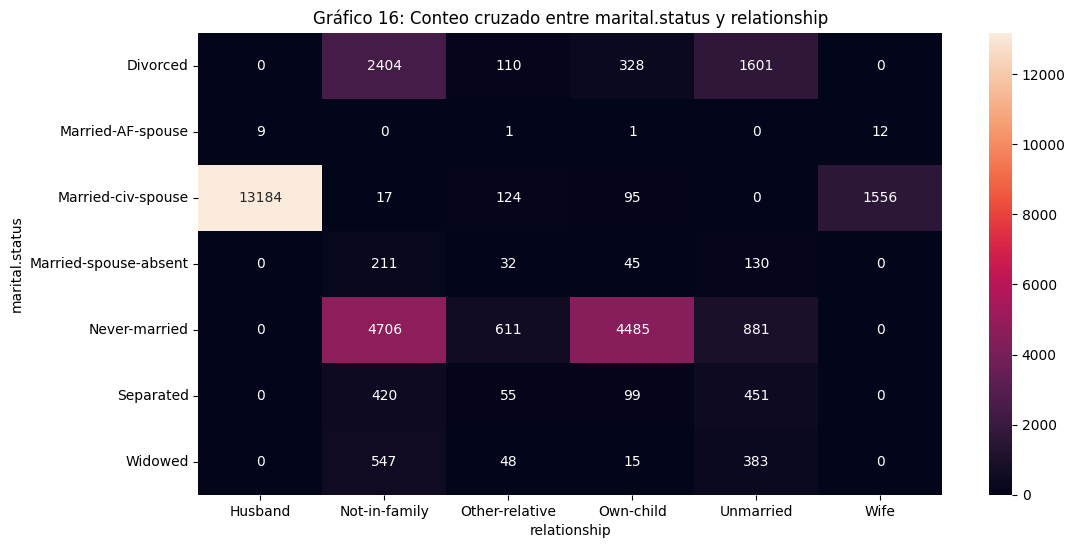

In [72]:
plt.figure(figsize = (12, 6))
sns.heatmap(pd.crosstab(data['marital.status'], data['relationship']), annot=True, fmt = "g")
plt.title('Gráfico 16: Conteo cruzado entre marital.status y relationship')

Al llevar a dummies marital.status y relationship, tendremos problemas dado el alto nivel de correlacion que nos daran la variable married_civ_spouse, con wife y husband, por lo que se recomienda dejar solo una varible, ya que expresan lo mismo.

#### **2.1.2.j Analisis occupation v/s workclass**

##### **Conteo cruzado entre occupation y workclass**

Text(0.5, 1.0, 'Gráfico 17: Conteo cruzado entre occupation y workclass')

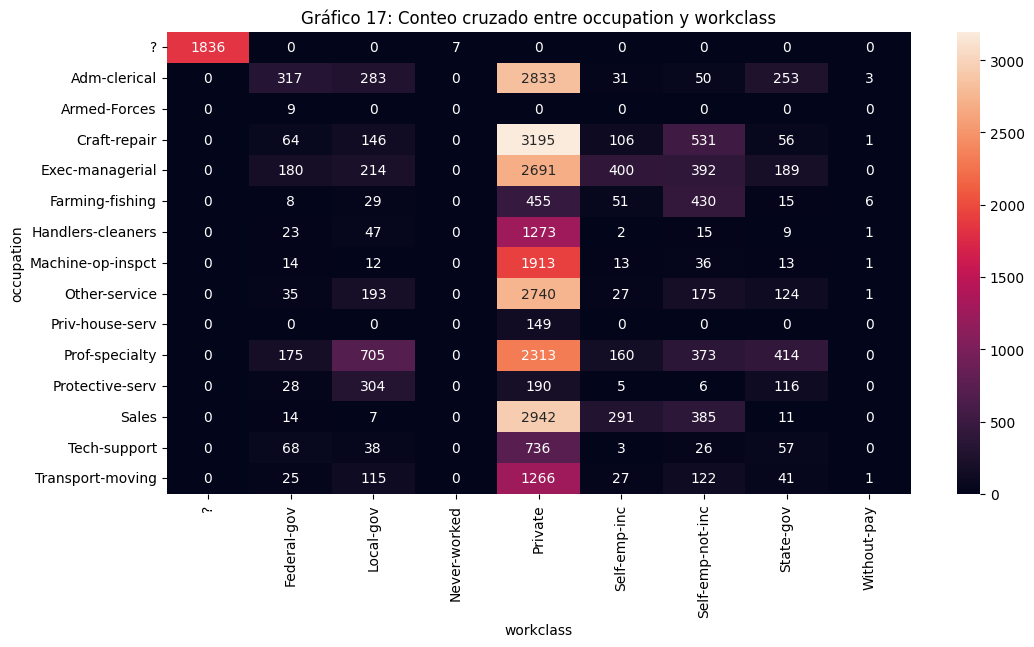

In [73]:
plt.figure(figsize = (12, 6))
sns.heatmap(pd.crosstab(data['occupation'], data['workclass']), annot=True, fmt = "g")
plt.title('Gráfico 17: Conteo cruzado entre occupation y workclass')

En este gráfico se observa que casi todos los individuos se agrupan dentro de empleos privados, también hay una cantidad no menor de individuos que son sus propios jefes, los cuales manejan grandes o pequeñas empresas. Además, se visualiza una gran cantidad de individuos que trabajan para distintos organismos gubernamentales, los cuales serán agrupados más adelante.  

# ***Sección 3***

## *3.1 Preparación de los datos*

### **3.1.1 Eliminación primeras variables dado análisis EDA**

La variable **education.num** expresa lo mismo que la variable **education**, por lo que procedemos a eliminarla.

Como fue mencionado en el analisis EDA, la variable **native.country** no aportaría mucho a los modelos dado que casi todos los datos de las personas indican que residen en USA.

Por último, las ¨**variables capital.gain**, y **capital.loss** tienen valores muy dispersos, dado que mayormente los datos de estas variables se encuentran concentrados en el cero.

In [74]:
data_1 = data.drop(['education.num', 'native.country', 'capital.gain', 'capital.loss', 'fnlwgt'], axis=1);data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital.status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours.per.week  32561 non-null  int64 
 9   income          32561 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


### **3.1.2 Agrupación de valores en variables tipo object**

#### **3.1.a variable 'workclass'**

Ya que existen variables categóricas que pueden reducir sus valores procedemos a la reduccion de valores en variables tipo object. Primero reconocemos que variables pueden ser comprimidas, creamos el diccionario y aplicamos estos cambios las variables del database. Esto sera aplicado a las variables 'workclass', 'education', 'occupation', 'relationship' y 'marital.status'

In [75]:
data_1[["workclass"]].value_counts()

workclass       
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Crearemos un diccionario con la relación entre los valores que queremos comprimir. En este caso, los valores **Federal-gov, Local-gov** y **State-gov** los comprimiremos como Government. **Self-emp-inc** y **Self-emp-not-inc** lo comprimiremos en Self-employed.

In [76]:
Workclass = {
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Self-emp-inc': 'Self-employed',
    'Self-emp-not-inc': 'Self-employed'
}

In [77]:
data_1['workclass'] = data_1['workclass'].map(Workclass).fillna(data_1['workclass'])
data_1[["workclass"]].value_counts()

workclass    
Private          22696
Government        4351
Self-employed     3657
?                 1836
Without-pay         14
Never-worked         7
Name: count, dtype: int64

#### **3.1.b variable 'education'**

In [78]:
data_1[["education"]].value_counts()

education   
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [79]:
Education = {
    'Preschool': 'Elementary Education',
    '1st-4th': 'Elementary Education',
    '5th-6th': 'Elementary Education',
    '7th-8th': 'Elementary Education',
    '9th': 'HS-Education',
    '10th': 'HS-Education',
    '11th': 'HS-Education',
    '12th': 'HS-Education',
    'HS-grad': 'HS-Education',
    'Some-college': 'PS-education',
    'Assoc-acdm': 'PS-education',
    'Assoc-voc': 'PS-education',
    'Bachelors': 'Higher Education',
    'Prof-school': 'Higher Education',
    'Masters': 'Higher Education',
    'Doctorate': 'Higher Education'
}

In [80]:
data_1['education'] = data_1['education'].map(Education).fillna(data_1['education'])
data_1[["education"]].value_counts()

education           
HS-Education            13556
PS-education             9740
Higher Education         8067
Elementary Education     1198
Name: count, dtype: int64

#### **3.1.c variable 'occupation'**

In [81]:
data_1[["occupation"]].value_counts()

occupation       
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [82]:
Occupation = {
    'Handlers-cleaners': 'Operations and Maintenance',
    'Machine-op-inspct': 'Operations and Maintenance',
    'Other-service': 'Services',
    'Priv-house-serv': 'Services',
    'Protective-serv': 'Services',
    'Prof-specialty': 'Professionals and Technicians',
    'Tech-support': 'Professionals and Technicians'
}

In [83]:
data_1['occupation'] = data_1['occupation'].map(Occupation).fillna(data_1['occupation'])
data_1[["occupation"]].value_counts()

occupation                   
Professionals and Technicians    5068
Craft-repair                     4099
Services                         4093
Exec-managerial                  4066
Adm-clerical                     3770
Sales                            3650
Operations and Maintenance       3372
?                                1843
Transport-moving                 1597
Farming-fishing                   994
Armed-Forces                        9
Name: count, dtype: int64

#### **3.1.d variable 'relationship'**

In [84]:
data[["relationship"]].value_counts()

relationship  
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [85]:
Relationship = {
    'Wife': 'Spouse',
    'Husband': 'Spouse'
}

In [86]:
data_1['relationship'] = data_1['relationship'].map(Relationship).fillna(data_1['relationship'])
data_1[["relationship"]].value_counts()

relationship  
Spouse            14761
Not-in-family      8305
Own-child          5068
Unmarried          3446
Other-relative      981
Name: count, dtype: int64

#### **3.1.e variable 'marital.status'**

In [87]:
data_1[["marital.status"]].value_counts()

marital.status       
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [88]:
Marital_status = {
    'Married-spouse-absent': 'Separated',
    'Married-AF-spouse': 'Married-civ-spouse'
}

In [89]:
data_1['marital.status'] = data_1['marital.status'].map(Marital_status).fillna(data_1['marital.status'])
data_1[["marital.status"]].value_counts()

marital.status    
Married-civ-spouse    14999
Never-married         10683
Divorced               4443
Separated              1443
Widowed                 993
Name: count, dtype: int64

### **3.1.3 Conversión de Variable Categórica (class) a Numérica**

Para conocer las variables de tipo object ejecutamos el siguiente codigo:

In [90]:
data_1.select_dtypes(include='object').columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'income'],
      dtype='object')

Llevamos a cabo la transformación a dummies de las variables tipo object

In [91]:
data_2 = pd.get_dummies(data_1, drop_first=True).astype(int);data_2

,age,hours.per.week,workclass_Government,workclass_Never-worked,workclass_Private,workclass_Self-employed,workclass_Without-pay,education_HS-Education,education_Higher Education,education_PS-education,...,relationship_Other-relative,relationship_Own-child,relationship_Spouse,relationship_Unmarried,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
0,90,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,18,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,40,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,54,40,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,41,40,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,40,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
32557,27,38,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
32558,40,40,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
32559,58,40,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


Verificamos que la transformación de object a dummies (en este caso se transformo a int64) se ha realizado de manera correcta.

In [92]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   age                                       32561 non-null  int64
 1   hours.per.week                            32561 non-null  int64
 2   workclass_Government                      32561 non-null  int64
 3   workclass_Never-worked                    32561 non-null  int64
 4   workclass_Private                         32561 non-null  int64
 5   workclass_Self-employed                   32561 non-null  int64
 6   workclass_Without-pay                     32561 non-null  int64
 7   education_HS-Education                    32561 non-null  int64
 8   education_Higher Education                32561 non-null  int64
 9   education_PS-education                    32561 non-null  int64
 10  marital.status_Married-civ-spouse         32561 non-null  

### **3.1.4 Eliminación segundas variables dado análisis EDA posterior a conversión a dummies**

Seran eliminadas las variables con pocos valores y las que indicaban que podrian traer problemas de multicolinealidad dada su correlacion casi perfecta. Aquellas fueron mencionadas en el EDA.

In [93]:
data_3 = data_2.drop(['workclass_Never-worked', 'workclass_Without-pay', 'occupation_Armed-Forces', 'relationship_Other-relative', 'race_Asian-Pac-Islander', 'race_Other', 'relationship_Spouse'], axis=1);data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   age                                       32561 non-null  int64
 1   hours.per.week                            32561 non-null  int64
 2   workclass_Government                      32561 non-null  int64
 3   workclass_Private                         32561 non-null  int64
 4   workclass_Self-employed                   32561 non-null  int64
 5   education_HS-Education                    32561 non-null  int64
 6   education_Higher Education                32561 non-null  int64
 7   education_PS-education                    32561 non-null  int64
 8   marital.status_Married-civ-spouse         32561 non-null  int64
 9   marital.status_Never-married              32561 non-null  int64
 10  marital.status_Separated                  32561 non-null  

### **3.1.5 Selección de variables a utilizar**

#### **3.1.5.a Matriz de Correlación**

Generaremos una matriz de correlacion para analizar si aun existen variables con alta correlacion.

Text(0.5, 1.0, 'Gráfico 18: Matriz de correlacion variables explicativas y a explicar')

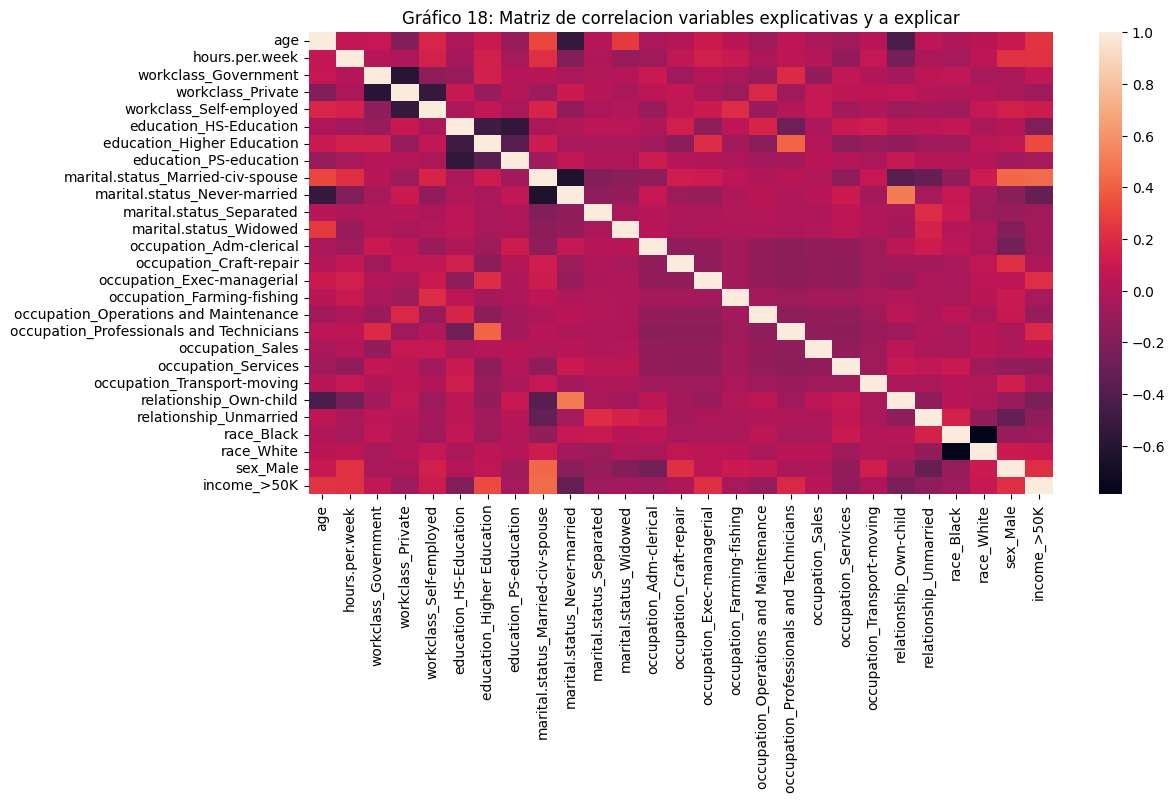

In [96]:
plt.figure(figsize = (12, 6))
sns.heatmap(data_3.corr(), annot = False)
plt.title('Gráfico 18: Matriz de correlacion variables explicativas y a explicar')

En el mapa no se visualizan colores demasiado claros, lo que indica que no existen altas correlaciones entre las variables explicativas. Para la selección de las variables ordenaremos las correlaciones con la variable a explicar y las variables explicativas ordenadas de mayor a menor.

In [ ]:
pd.DataFrame(data_3.corr()[data_3.columns[-1]]).sort_values(by = data_3.columns[-1], ascending = False)

,income_>50K
income_>50K,1.000000
marital.status_Married-civ-spouse,0.445289
education_Higher Education,0.327168
age,0.234037
hours.per.week,0.229689
sex_Male,0.215980
occupation_Exec-managerial,0.214861
occupation_Professionals and Technicians,0.182596
workclass_Self-employed,0.105861
race_White,0.085224


#### **3.1.5.b Dataset con variables a usar**

**Para el modelado utilizaremos las siguientes variables dada su alta correlación, usaremos tanto correlaciones positivas, asi como negativas:**

* marital.status_Married-civ-spouse	0.445289
* education_Higher Education	0.327168
* age	0.234037
* hours.per.week	0.229689
* sex_Male	0.215980
* occupation_Exec-managerial	0.214861
* occupation_Professionals and Technicians	0.182596
* relationship_Unmarried	-0.142857
* education_HS-Education	-0.205074
* relationship_Own-child	-0.228532
* marital.status_Never-married	-0.318440

In [ ]:
data_4 = data_3[['income_>50K', 'marital.status_Married-civ-spouse', 'education_Higher Education', 'age', 'hours.per.week', 'sex_Male', 'occupation_Exec-managerial', 'occupation_Professionals and Technicians', 'relationship_Unmarried', 'education_HS-Education', 'relationship_Own-child', 'marital.status_Never-married']];data_4

,income_>50K,marital.status_Married-civ-spouse,education_Higher Education,age,hours.per.week,sex_Male,occupation_Exec-managerial,occupation_Professionals and Technicians,relationship_Unmarried,education_HS-Education,relationship_Own-child,marital.status_Never-married
0,0,0,0,90,40,0,0,0,0,1,0,0
1,0,0,0,82,18,0,1,0,0,1,0,0
2,0,0,0,66,40,0,0,0,1,0,0,0
3,0,0,0,54,40,0,0,0,1,0,0,0
4,0,0,0,41,40,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,22,40,1,0,0,0,0,0,1
32557,0,1,0,27,38,0,0,1,0,0,0,0
32558,1,1,0,40,40,1,0,0,0,1,0,0
32559,0,0,0,58,40,0,0,0,1,1,0,0


## *3.2 Preparación para construcción del modelo*

### **3.2.1 Definición de variables explicativas y a explicar**

In [ ]:
X = data_4[['marital.status_Married-civ-spouse', 'education_Higher Education', 'age', 'hours.per.week', 'sex_Male', 'occupation_Exec-managerial', 'occupation_Professionals and Technicians', 'relationship_Unmarried', 'education_HS-Education', 'relationship_Own-child', 'marital.status_Never-married']]
y = data_4['income_>50K']

### **3.2.2 Generación de sets de entrenamiento y test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### **3.2.3 Reescalado de Variables**

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled, columns = X_train.columns)

,marital.status_Married-civ-spouse,education_Higher Education,age,hours.per.week,sex_Male,occupation_Exec-managerial,occupation_Professionals and Technicians,relationship_Unmarried,education_HS-Education,relationship_Own-child,marital.status_Never-married
0,0.0,0.0,0.027397,0.602041,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.205479,0.397959,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.698630,0.112245,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.095890,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.315068,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
26043,1.0,0.0,0.506849,0.193878,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26044,0.0,0.0,0.246575,0.397959,0.0,0.0,1.0,1.0,1.0,0.0,0.0
26045,1.0,1.0,0.260274,0.448980,1.0,0.0,1.0,0.0,0.0,0.0,0.0
26046,0.0,0.0,0.150685,0.418367,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# ***Sección 4***

## ***4.1 Modelado Regresión Logística***

### **4.1.1 Entrenamiento del modelo**

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

### **4.1.2 Predicción del modelo**

In [ ]:
predicciones_log = log_model.predict(X_test_scaled)

### **4.1.3 Valores reales vs Predicciones**

In [ ]:
pd.DataFrame({'Valor Real': y_test.values,
              'Predicciones': predicciones_log})

,Valor Real,Predicciones
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
6508,0,0
6509,0,0
6510,0,0
6511,0,0


## ***4.2 Evaluación Regresión Logística***

In [ ]:
probabilidades_log = log_model.predict_proba(X_test_scaled)[:,1]

### **4.2.1 Reporte de clasificación**

In [ ]:
umbrales = [0.3, 0.5, 0.7]
for umbral in umbrales:
  predicciones_log = (probabilidades_log >= umbral).astype(int)
  print(f"Reporte de clasificacion para umbral {umbral}:")
  print(classification_report(y_test, predicciones_log))

Reporte de clasificacion para umbral 0.3:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4920
           1       0.57      0.72      0.64      1593

    accuracy                           0.80      6513
   macro avg       0.73      0.77      0.75      6513
weighted avg       0.82      0.80      0.81      6513

Reporte de clasificacion para umbral 0.5:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4920
           1       0.69      0.49      0.57      1593

    accuracy                           0.82      6513
   macro avg       0.77      0.71      0.73      6513
weighted avg       0.81      0.82      0.81      6513

Reporte de clasificacion para umbral 0.7:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4920
           1       0.79      0.31      0.45      1593

    accuracy                           0.81      6513
  

Se utilizaron 3 umbrales distintos para evaluar nuestro modelo de regresión logística, siendo de 0.3, 0.5 y 0.7 respectivamente, con los cuales se pudo concluir que la sensibilidad (recall) fue de 72% para el umbral 0.3, 49% para el umbral 0.5 y 31% para el umbral 0.7, esta disminución en el porcentaje se explica por el umbral, puesto que la sensibilidad indica cuantos resultados de la clase 1 fueron correctamente reconocidos, por lo tanto, al empezar con un punto de operación pequeño aumenta la posibilidad de acertar en que el resultado de la clase sea 1, al ir incrementando los puntos de operación fue disminuyendo el porcentaje de los casos que fueron reconocidos correctamente por el modelo, por lo que a un punto de operación más bajo se obtuvo una mejor detección de casos correctamente reconocidos y con un umbral más alto se obtuvo una peor detección de casos correctamente reconocidos.

En el reporte de clasificación obtuvimos que el Accuracy arrojó que dentro del umbral 0.3 el modelo ha arrojado una precisión del 80%, es decir,  el modelo ha clasificado correctamente el 80% de los datos. Dentro del umbral 0.5 el modelo ha arrojado una precisión del 82%, es decir,  el modelo ha clasificado correctamente el 82% de los datos. Dentro del umbral 0.7 el modelo ha arrojado una precisión del 81%, es decir,  el modelo ha clasificado correctamente el 81% de los datos. Sin embargo, el accuracy tiene una trampa que es la propensión al sobreajuste, ya que éste se ve sesgado por la cantidad de datos con la cual es entrenado el modelo. Hablando específicamente de este caso en el cual un 80% de los datos fue utilizado para entrenar el modelo, se obtuvo que los valores en el accuracy fueron bastante altos, dando como resultado en los tres puntos de operacion más del 80% de datos correctamente predichos, y si bien estos pudiesen ser resultados favorables se obtendrían resultados distintos en el caso de utilizar datos diferentes a los usados en el entrenamiento, pues el modelo al estar entrenado con una no menor masa de datos, se ve afectado por un sobreajuste y no sería capaz de predecir correctamente nuevos datos, por lo que en este nuevo caso se obtendría un accuracy mucho menor al obtenido en el actual.

En el reporte de clasificación se obtuvo que la precisión fue de 57% para el umbral 0.3, 69% para el umbral 0.5 y 79% para el umbral 0.7, esto nos indica que a un mayor punto de operación se obtiene una mejor precisión ya que al aumentar el umbral hay una mayor rigurosidad para clasificar cuales datos son realmente verdaderos positivos, es por esto por lo que también al tener un menor umbral se obtiene una precisión menor.

Concluimos que el punto de operación 0.5 fue el punto donde el modelo arrojó resultados en las métricas más balanceados. Nosotros identificamos que en este umbral se presenta un buen equilibrio entre las predicciones verdaderas tanto positivas como negativas y se minimizan más los resultados falsos.  


### **4.2.2 Matriz de confusión**

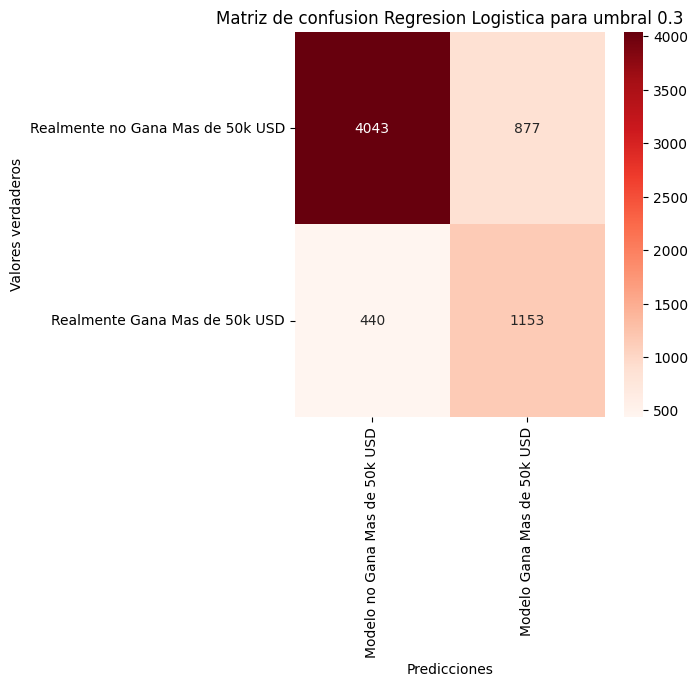

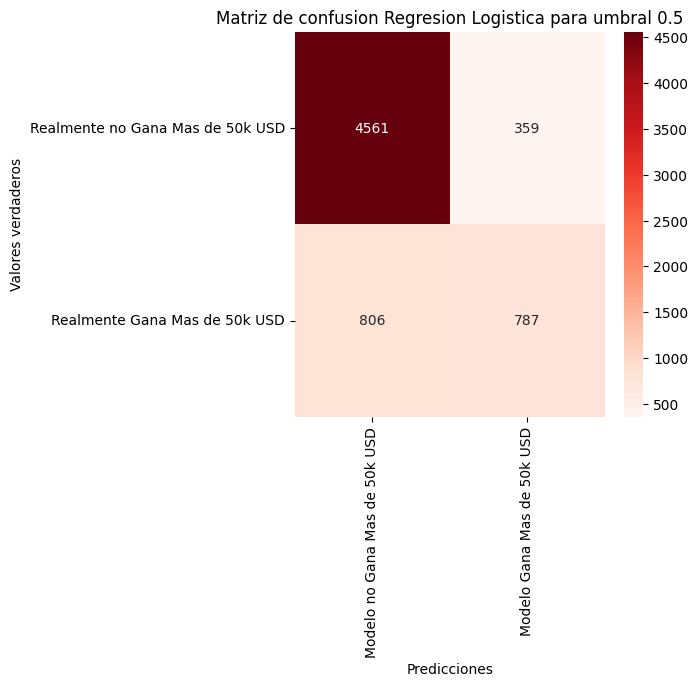

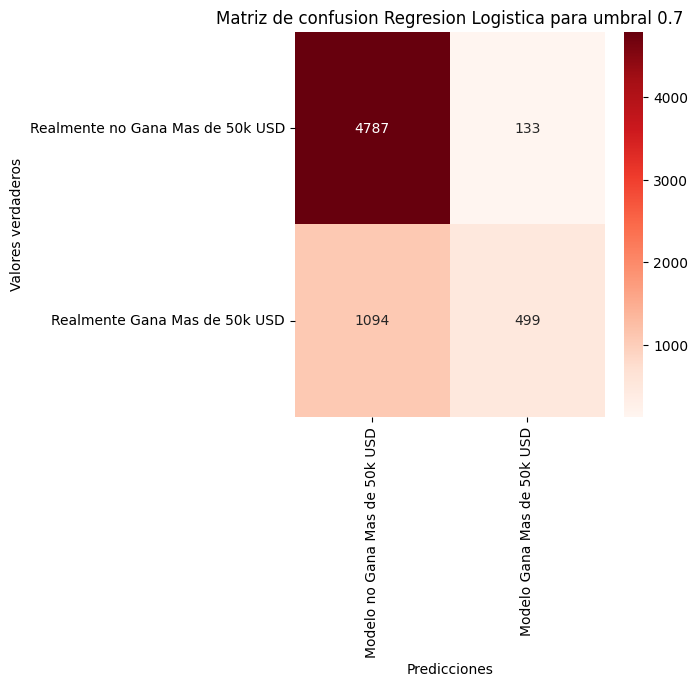

In [ ]:
umbrales = [0.3, 0.5, 0.7]

for umbral in umbrales:
  predicciones_log = (probabilidades_log >= umbral).astype(int)

  cm = confusion_matrix(y_test, predicciones_log)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot = True, cmap = "Reds", fmt = "g", yticklabels=["Realmente no Gana Mas de 50k USD" , "Realmente Gana Mas de 50k USD"] , xticklabels=["Modelo no Gana Mas de 50k USD" , "Modelo Gana Mas de 50k USD"])
  plt.title(f"Matriz de confusion Regresion Logistica para umbral {umbral}")
  plt.xlabel("Predicciones")
  plt.ylabel("Valores verdaderos")

Para la matriz de confusión en el umbral de 0.3 obtuvimos que, en este punto de operación, el modelo logró predecir 5.196 casos verdaderos, los cuales se dividen en 1153 verdaderos positivos y 4043 verdaderos negativos. Sin embargo, se obtuvo que el modelo predijo 1317 casos falsos los cuales se dividen en 877 falsos positivos y 440 falsos negativos.

En el umbral 0.5 obtuvimos que el modelo logró predecir 5.348 casos verdaderos, los cuales se divien en 787 verdaderos positivos y 4561 verdaderos negativos. Sin embargo, se obtuvo que el modelo predijo 1.165 casos falsos, los cuales se divien en 359 falsos positivo y 806 falso negativos.


 Por último, en el umbral 0.7 obtuvimos que el modelo logró predecir 5.286 casos verdaderos los cuales se dividen en 499 verdaderos positivosy 4787 verdaderos negativos. No obstante, se obtuvo que el modelo predijo 1.227 casos falsos que se dividen en 133 falsos positivos y 1094 falsos negativos.

 En conclusión, pudimos observar que el punto de operación 0.5 fue el punto donde el modelo arrojó predicciones más balanceadas, destacando que en éste se obtuvo la mayor cantidad de casos correctamente predichos, por lo tanto, en este caso específico de la predicción de que una persona tenga un ingreso mayor a los 50.000 USD, creemos que para el modelo de regresión logística el punto de operación óptimo es el de 0.5.

## ***4.3 Modelado Random Forest***

### **4.3.1 Entrenamiento del modelo**

In [ ]:
rf = RandomForestClassifier(n_estimators = 110)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=110)

Para el entrenamiento del modelo se utilzaron 110 árboles, obteniendo los resultados que se analizarán a continuación. Sin embargo, cabe mencionar que se utilizaron 200 y 300 árboles para el entrenamiento del modelo, pero se concluyó que este aumento en la cantidad de árboles no significó un aumento en el desempeño del modelo, por lo que para evitar un mayor esfuerzo computacional innecesario se definió que se utilizarán 110 árboles.

### **4.3.2 Predicción del modelo**

In [ ]:
predicciones_rf = rf.predict(X_test);predicciones_rf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0])

### **4.3.3 Valores reales vs Predicciones**

In [ ]:
pd.DataFrame({'Valor Real': y_test.values,
              'Predicciones': predicciones_rf})

,Valor Real,Predicciones
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
6508,0,0
6509,0,0
6510,0,0
6511,0,0


## ***4.4 Evaluación Random Forest***

In [ ]:
probabilidades_rf = rf.predict_proba(X_test_scaled)[:,1]

### **4.4.1 Reporte de clasificación**

In [ ]:
umbrales = [0.3, 0.5, 0.7]
for umbral in umbrales:
  predicciones_rf = (probabilidades_rf >= umbral).astype(int)
  print(f"Reporte de clasificacion para umbral {umbral}:")
  print(classification_report(y_test, predicciones_rf))

Reporte de clasificacion para umbral 0.3:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4920
           1       0.54      0.72      0.61      1593

    accuracy                           0.78      6513
   macro avg       0.72      0.76      0.73      6513
weighted avg       0.81      0.78      0.79      6513

Reporte de clasificacion para umbral 0.5:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4920
           1       0.63      0.53      0.57      1593

    accuracy                           0.81      6513
   macro avg       0.74      0.71      0.73      6513
weighted avg       0.80      0.81      0.80      6513

Reporte de clasificacion para umbral 0.7:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4920
           1       0.69      0.37      0.48      1593

    accuracy                           0.81      6513
  

Se utilizaron 3 umbrales distintos para evaluar nuestro modelo Random Forest, siendo de 0.3, 0.5 y 0.7 respectivamente, con los cuales se pudo concluir que la sensibilidad (recall) fue de 72% para el umbral 0.3, 53% para el umbral 0.5 y 37% para el umbral 0.7, esta disminución en el porcentaje se explica por el umbral, puesto que la sensibilidad indica cuantos resultados de la clase 1 fueron correctamente reconocidos, por lo tanto, al empezar con un punto de operación pequeño aumenta la posibilidad de acertar en que el resultado de la clase sea 1, al ir incrementando los puntos de operación fue disminuyendo el porcentaje de los casos que fueron reconocidos correctamente por el modelo, por lo que a un punto de operación más bajo se obtuvo una mejor detección de casos correctamente reconocidos y con un umbral más alto se obtuvo una peor detección de casos correctamente reconocidos.

En el reporte de clasificación obtuvimos que el Accuracy arrojó que dentro del umbral 0.3 el modelo tiene una precisión del 78%, es decir,  el modelo ha clasificado correctamente el 78% de los datos. Dentro del umbral 0.5 el modelo ha arrojado una precisión del 81%, es decir,  el modelo ha clasificado correctamente el 81% de los datos. Dentro del umbral 0.7 el modelo ha arrojado una precisión del 81%, es decir,  el modelo ha clasificado correctamente el 81% de los datos. Sin embargo, el accuracy tiene una trampa que es la propensión al sobreajuste, ya que éste se ve sesgado por la cantidad de datos con la cual es entrenado el modelo. Hablando específicamente de este caso en el cual un 80% de los datos fue utilizado para entrenar el modelo, se obtuvo que los valores en el accuracy fueron bastante altos, dando como resultado en los tres puntos de operacion más del 78% de datos correctamente predichos, y si bien estos pudiesen ser resultados favorables se obtendrían resultados distintos en el caso de utilizar datos diferentes a los usados en el entrenamiento, pues el modelo al estar entrenado con una no menor masa de datos, se ve afectado por un sobreajuste y no sería capaz de predecir correctamente nuevos datos, por lo que en este nuevo caso se obtendría un accuracy mucho menor al obtenido en el actual.

Además, en este caso de la utilización del Random Forest no podemos asegurar que la métrica accuracy arroje resultados fiables, puesto que la distribución de todas las clases está muy desbalanceada.

En el reporte de clasificación se obtuvo que la precisión fue de 54% para el umbral 0.3, 63% para el umbral 0.5 y 69% para el umbral 0.7, esto nos indica que a un mayor punto de operación se obtiene una mejor precisión ya que al aumentar el umbral hay una mayor rigurosidad para clasificar cuales datos son realmente verdaderos positivos, por lo que también al tener un menor umbral se obtiene una precisión menor.




### **4.4.1Matriz de confusión**

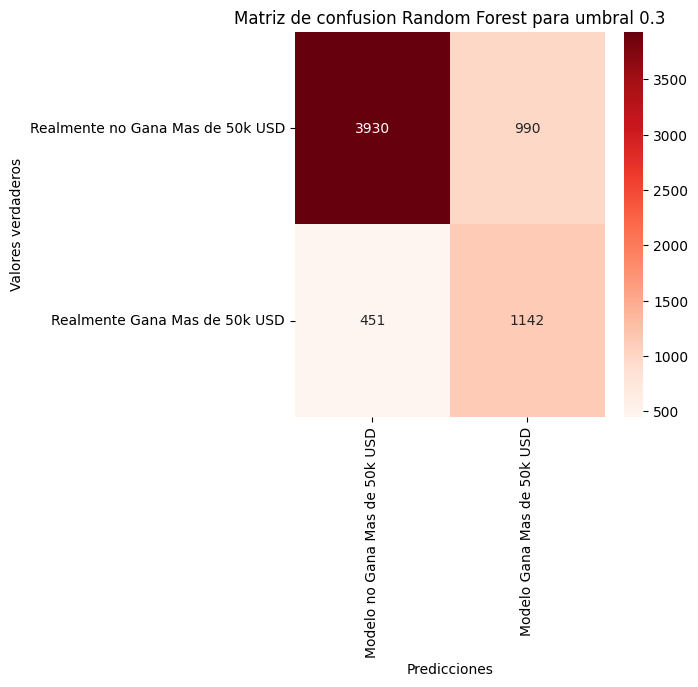

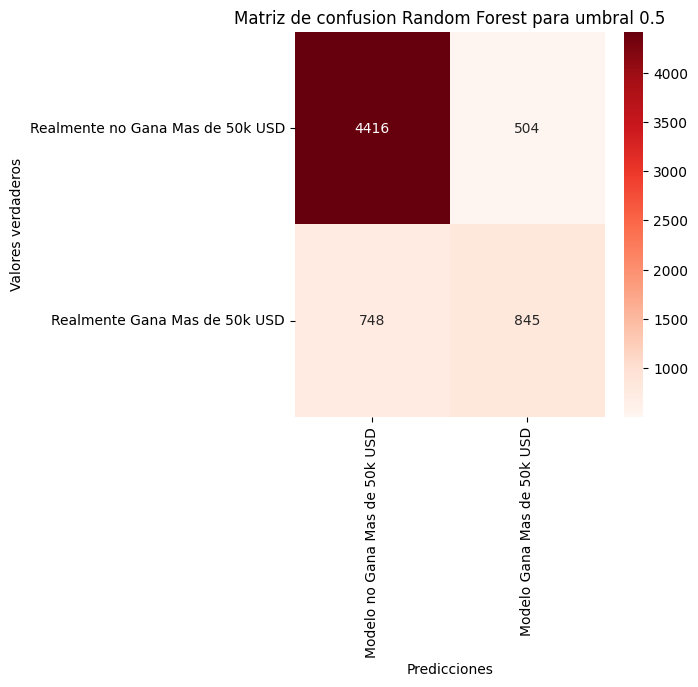

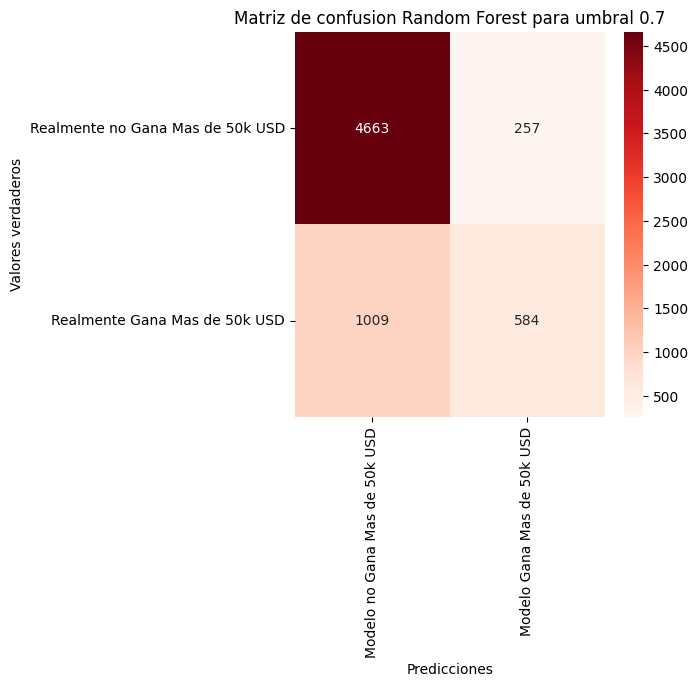

In [ ]:
umbrales = [0.3, 0.5, 0.7]
for umbral in umbrales:
  predicciones_rf = (probabilidades_rf >= umbral).astype(int)

  cm_rf = confusion_matrix(y_test, predicciones_rf)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm_rf, annot = True, cmap = "Reds", fmt = "g", yticklabels=["Realmente no Gana Mas de 50k USD" , "Realmente Gana Mas de 50k USD"] , xticklabels=["Modelo no Gana Mas de 50k USD" , "Modelo Gana Mas de 50k USD"])
  plt.title(f"Matriz de confusion Random Forest para umbral {umbral}")
  plt.xlabel("Predicciones")
  plt.ylabel("Valores verdaderos")


 Para la matriz de confusión en el umbral de 0.3 obtuvimos que, en este punto de operación, el modelo logró predecir 5.072 casos verdaderos, los cuales se dividen en 1142 verdaderos positivos y 3930 verdaderos negativos. Sin embargo, se obtuvo que el modelo predijo 1441 casos falsos los cuales se dividen en 990 falsos positivos y 451 falsos negativos.
En el umbral 0.5 obtuvimos que el modelo logró predecir 5.261 casos verdaderos, los cuales se dividen en 845 verdaderos positivos y 4416 verdaderos negativos. Sin embargo, se obtuvo que el modelo predijo 1.252 casos falsos, los cuales se dividen en 504 falsos positivo y 748 falso negativos.
Por último, en el umbral 0.7 obtuvimos que el modelo logró predecir 5.247 casos verdaderos los cuales se dividen en 584 verdaderos positivos y 4663 verdaderos negativos. No obstante, se obtuvo que el modelo predijo 1.266 casos falsos que se dividen en 257 falsos positivos y 1009 falsos negativos.
En conclusión, pudimos observar que el punto de operación 0.5 fue el punto donde el modelo arrojó predicciones más balanceadas, destacando que en éste se obtuvo la mayor cantidad de casos correctamente predichos, por lo tanto, en este caso específico de la predicción de que una persona tenga un ingreso mayor a los 50.000 USD, creemos que para el modelo Random Forest el punto de operación óptimo es el de 0.5.




## Conclusión Final

Como conclusión, según lo analizado en este notebook y luego de revisar ambos modelos y sus resultados, podemos definir que, específicamente para esta base de datos, el modelo más óptimo para predecir si una persona tiene un ingreso superior a 50.000 USD es el de Regresión Logística con un punto de operación de 0.5, ya que con este modelo y con este umbral fue con el que se obtuvieron una mayor cantidad de datos correctamente predichos, además mencionar que en este caso específico en el cual la composición de la base de datos no permite un correcto balanceo, no resulta óptimo la utilización de los resutados obtenidos con el modelo Random Forest.